# Hackathon first year exam
### Group 3: Emmanuel Adoh, Alexandra Biddiscombe, Alessio Carnevale, Youssef Sedra, Giacomo Villani

In [1]:
# Imports:

# For dataframe creation:
import pandas as pd
import numpy as np
# import os

# For visualisations:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# For linear regressions:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Dataset creation:
We saved the data initially in .csv files per city, each containing the hourly temperature and precipitation data of that city.
We selected the cities of Lugano, Calabria, Athens, Copenhagen and Vilnius.
These cities were selected so as to have an even distribution of northern and southers cities in out dataset, so as to analyse if certain trends appear differently according to the latitude. The northern cities are Copenhagen and Vilnius, whereas southern are Calabria and Athens, and Lugano is our slightly more central case. 



### Creating multiple csvs for yearly and monthly data, per city, for linear regression

In [2]:
# Creating datasets for min, max, mean temperatures and precipitations per city

# reading the csv file
a = [
    "Athens_data.csv",
    "Calabria_data.csv",
    "Copenhagen_data.csv",
    "Lugano_data.csv",
    "Vilnius_data.csv",
]

extra_path = "dataset/"
for i in a:
    df = pd.read_csv(extra_path + i)

    df["date"] = pd.to_datetime(df["date"])

    # Step 2: Set the 'date' column as the index
    df.set_index("date", inplace=True)

    # Step 3: Resample the data to monthly values, e.g., using sum, mean, etc.
    # For example, if we want the sum of values for each month:
    monthly_df = df.resample("M").agg(
        {
            "temperature_2m": ["mean", "max", "min"],
            "precipitation": ["mean", "max", "min"],
        }
    )
    yearly_df = df.resample("Y").agg(
        {
            "temperature_2m": ["mean", "max", "min"],
            "precipitation": ["mean", "max", "min"],
        }
    )
    # Flatten the MultiIndex columns
    monthly_df.columns = ["_".join(col).strip() for col in monthly_df.columns.values]
    yearly_df.columns = ["_".join(col).strip() for col in yearly_df.columns.values]

    # Step 4: Reset the index if you want the date as a column again
    monthly_df.reset_index(inplace=True)
    yearly_df.reset_index(inplace=True)

    # Step 5: Save the dataframe to a CSV file
    monthly_df.to_csv(f"dataset/formatted-sets/monthly_values_{i}", index=False)
    yearly_df.to_csv(f"dataset/formatted-sets/yearly_values_{i}", index=False)



### Merging files into one csv, for visualisation of initial graphs

In [3]:
# reading the csv files
a = [
    "dataset/formatted-sets/yearly_values_Athens_data.csv",
    "dataset/formatted-sets/yearly_values_Calabria_data.csv",
    "dataset/formatted-sets/yearly_values_Copenhagen_data.csv",
    "dataset/formatted-sets/yearly_values_Lugano_data.csv",
    "dataset/formatted-sets/yearly_values_Vilnius_data.csv",
]
b = [
    "dataset/formatted-sets/monthly_values_Athens_data.csv",
    "dataset/formatted-sets/monthly_values_Calabria_data.csv",
    "dataset/formatted-sets/monthly_values_Copenhagen_data.csv",
    "dataset/formatted-sets/monthly_values_Lugano_data.csv",
    "dataset/formatted-sets/monthly_values_Vilnius_data.csv",
]

location_names = {
    0: "Athens",
    1: "Calabria",
    2: "Copenhagen",
    3: "Lugano",
    4: "Vilnius",
}

# Initialize an empty list to store dataframes
yearly_dfs = []
monthly_dfs = []

# Loop through each file and read into dataframe
for index, file_name in enumerate(a):
    df = pd.read_csv(file_name)

    # Add a new column with the file identifier (e.g., number)
    df.insert(0, "City", location_names[index])

    # Append to the list of dataframes
    yearly_dfs.append(df)

# Concatenate all dataframes into one
final_df = pd.concat(yearly_dfs, ignore_index=True)

# Save the final DataFrame to a new CSV file
final_df.to_csv("dataset/formatted-sets/yearly_combined_files.csv", index=False)


# Loop Through Monthly data
for index, file_name in enumerate(b):
    df = pd.read_csv(file_name)

    # Add a new column with the file identifier (e.g., number)
    df.insert(0, "City", location_names[index])

    # Append to the list of dataframes
    monthly_dfs.append(df)

# Concatenate all dataframes into one
final_df = pd.concat(monthly_dfs, ignore_index=True)

# Save the final DataFrame to a new CSV file
final_df.to_csv("dataset/formatted-sets/monthly_combined_files.csv", index=False)


## Initial visualisations:
Visualise the temperatures and precipitations over the years at different resolutions, for each city on the same graph:
- Mean Temperature per year
- Mean precipitations per year

- Max Temperature per 10 year bin
- Min Temperature per 10 year bin


In [4]:
def plot_graph(df, type):
    
    location_colors = {"Lugano": 'blue',
                    "Calabria": 'red',
                    "Athens": 'green',
                    "Copenhagen": '#FFBF00',
                    "Vilnius": 'purple'
                    }

    palette = {key: location_colors[key] for key in df['City'].unique()}

    plt.figure(figsize=(14, 10))


    if type == "max":
        plt.title("Max Temperatures Trend Graph")
        sns.lineplot(data=df, x='date', y='temperature_2m_max', hue='City', linewidth=2, palette=palette)
    elif type == "mean":
        plt.title("Mean Temperatures Trend Graph")        
        sns.lineplot(data=df, x='date', y='temperature_2m_mean', hue='City', linewidth=2, palette=palette)
    elif type == "min":
        plt.title("Min Temperatures Trend Graph")
        sns.lineplot(data=df, x='date', y='temperature_2m_min', hue='City', linewidth=2, palette=palette)

    

    # Adding title and labels
    plt.xlabel('Time')
    plt.xticks(rotation=60)
    plt.ylabel('Temperature (°C)')
    plt.legend(title='Location')
    plt.grid(True)
    # Show plot
    plt.show()

    plt.cla()
    plt.clf()


/home/abiddisco/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/abiddisco/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


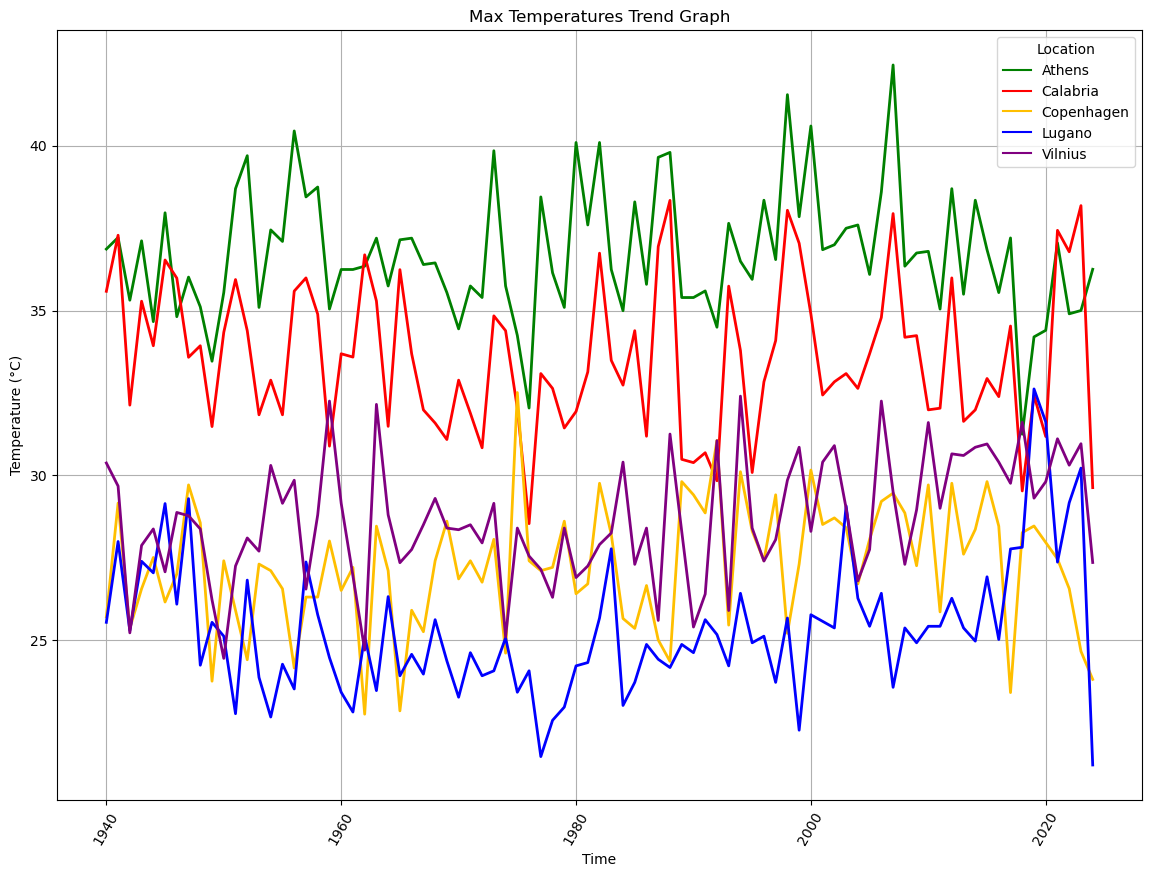

/home/abiddisco/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/abiddisco/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 640x480 with 0 Axes>

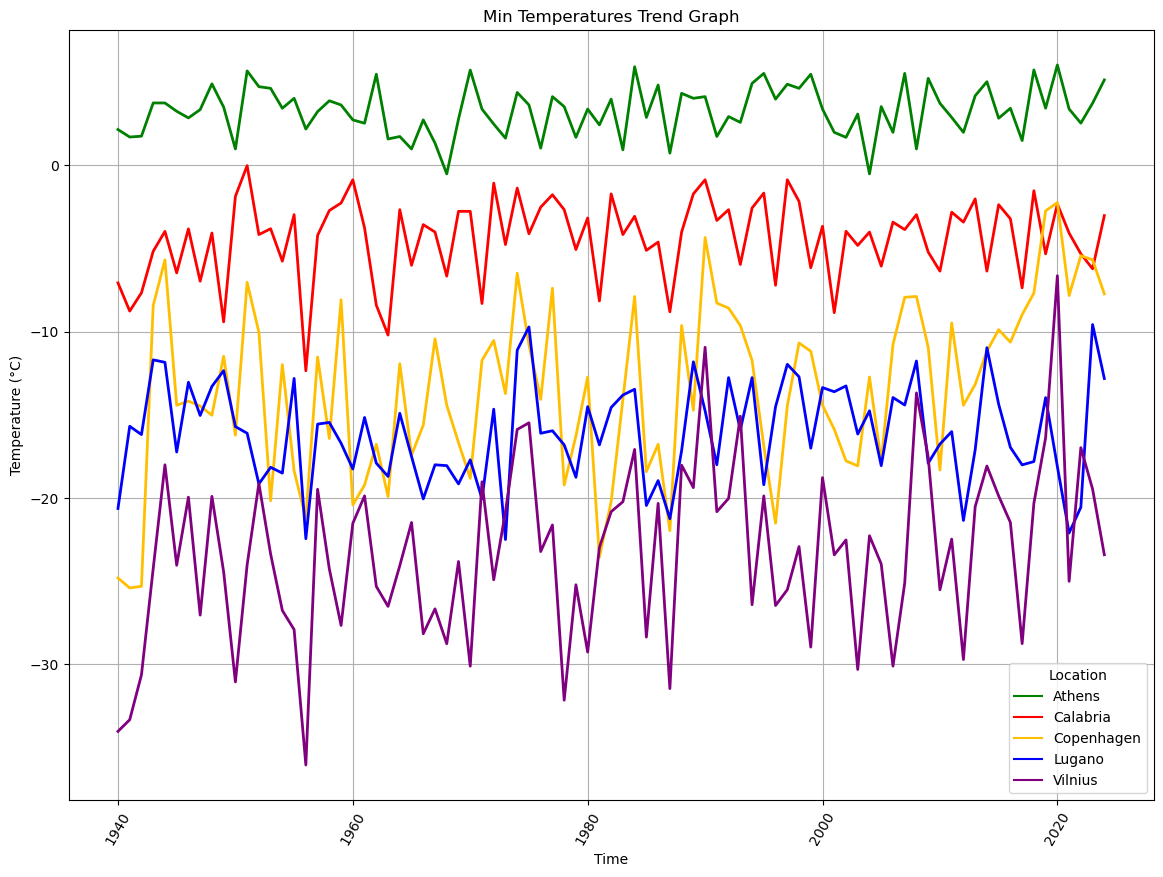

/home/abiddisco/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/abiddisco/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 640x480 with 0 Axes>

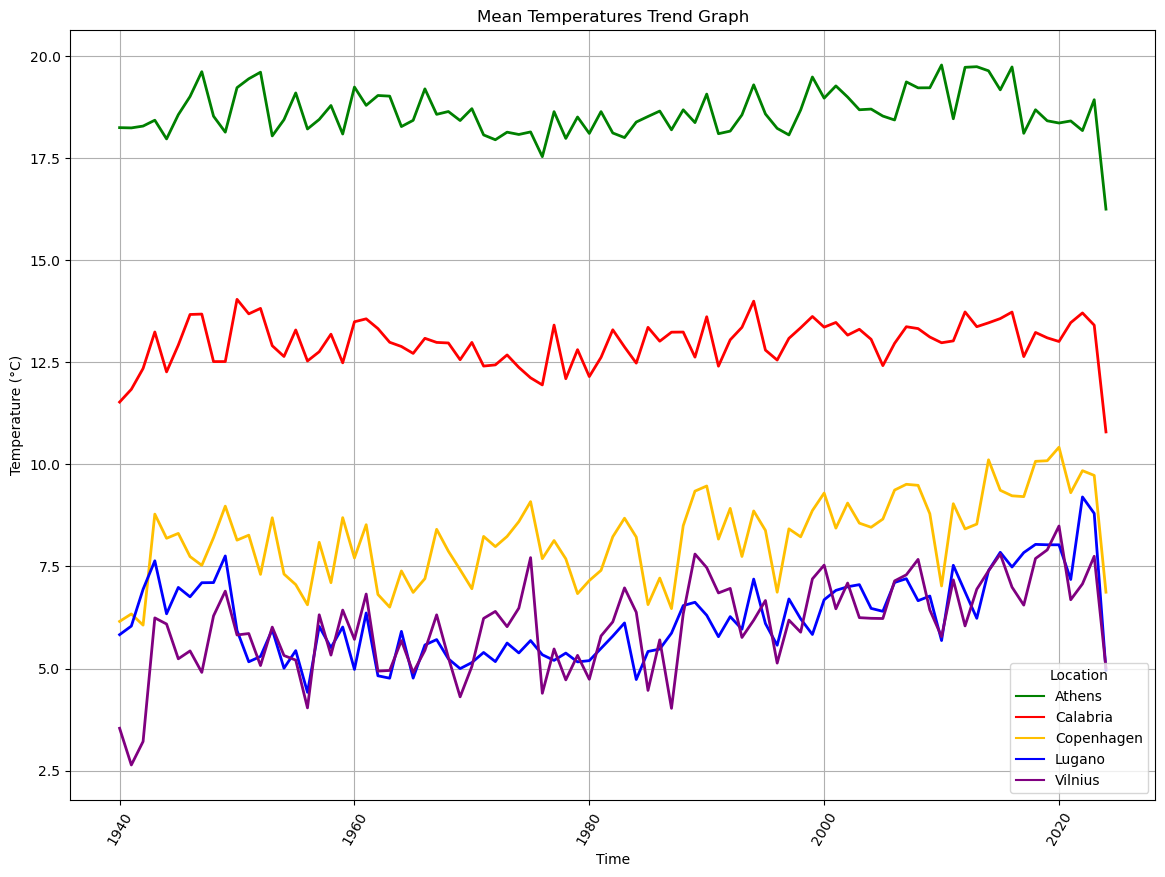

/home/abiddisco/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/abiddisco/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 640x480 with 0 Axes>

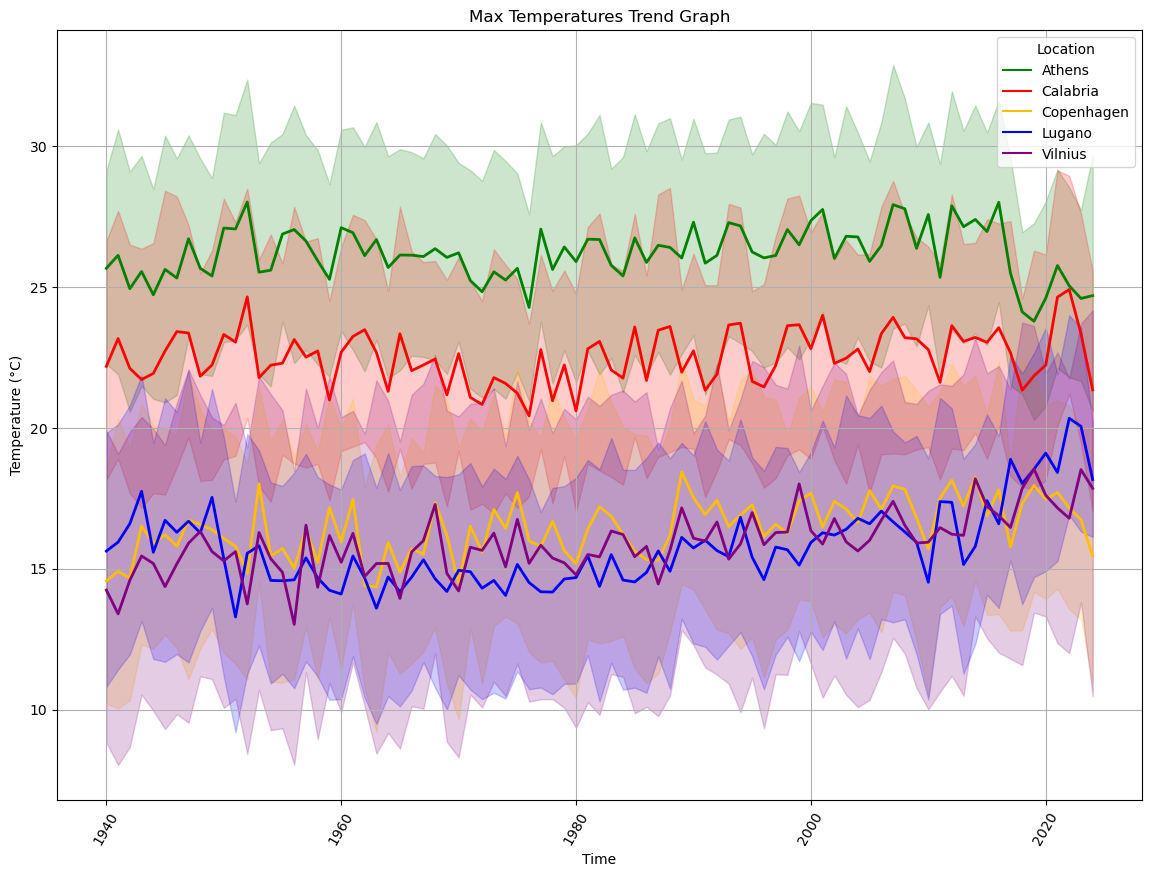

/home/abiddisco/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/abiddisco/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 640x480 with 0 Axes>

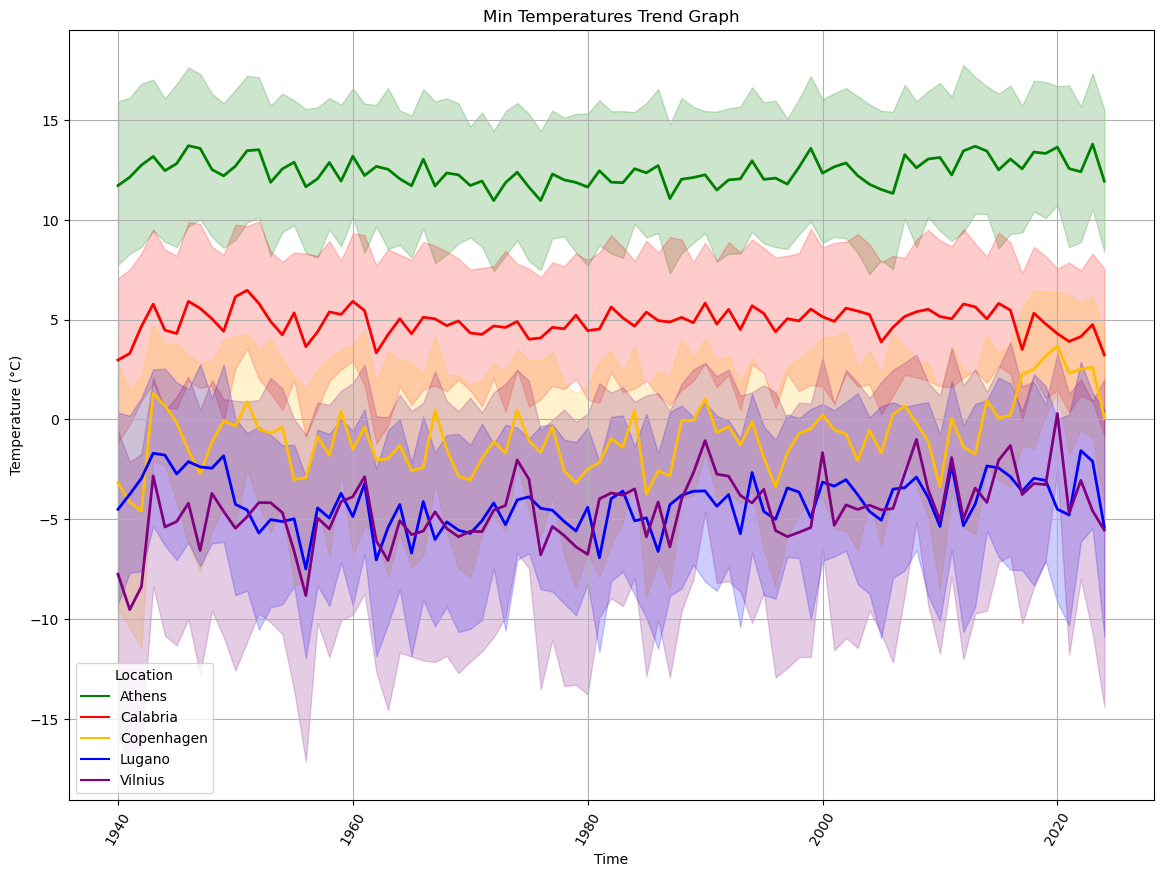

/home/abiddisco/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/abiddisco/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 640x480 with 0 Axes>

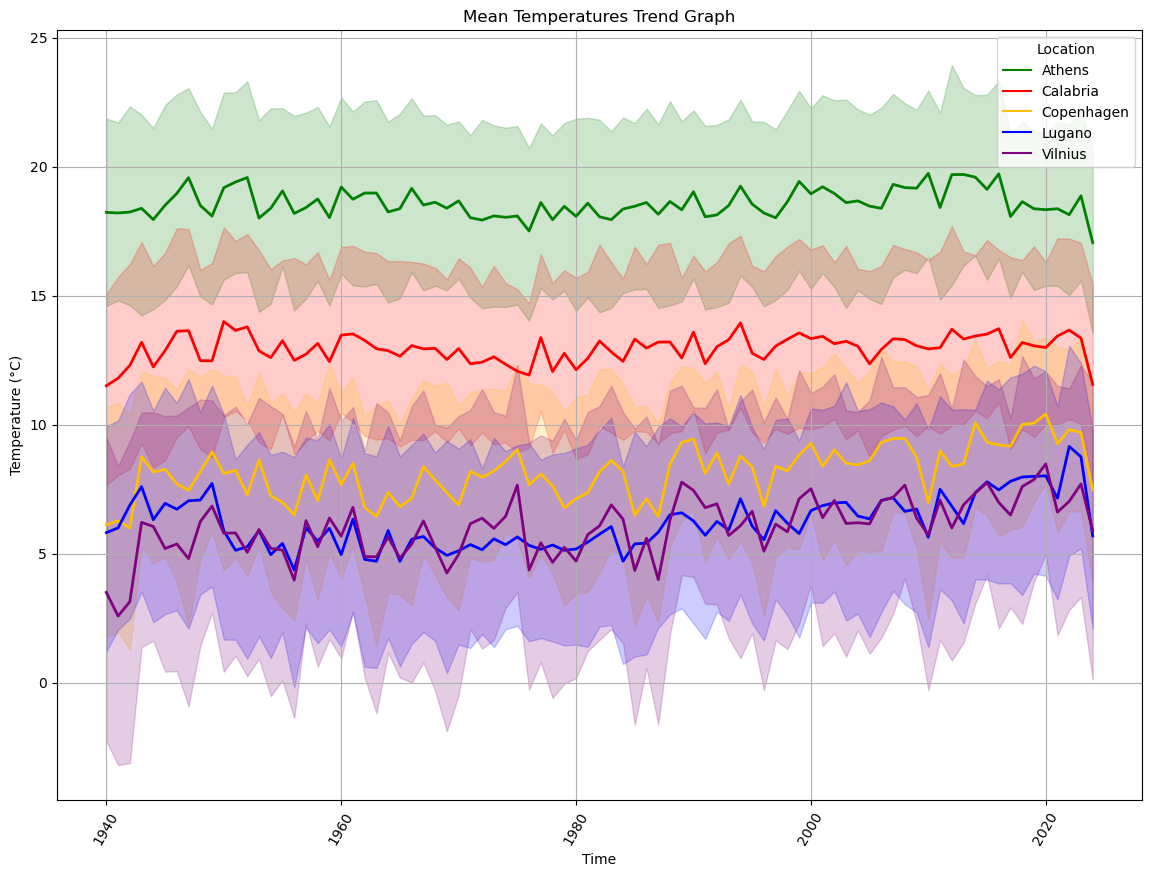

<Figure size 640x480 with 0 Axes>

In [5]:
yearly = pd.read_csv("dataset/formatted-sets/yearly_combined_files.csv")
monthly = pd.read_csv("dataset/formatted-sets/monthly_combined_files.csv")

yearly["date"] = pd.to_datetime(yearly["date"])
yearly["date"] = yearly["date"].dt.year

plot_graph(yearly, "max")
plot_graph(yearly, "min")
plot_graph(yearly, "mean")

print("\n\n")

monthly["date"] = pd.to_datetime(monthly["date"])
monthly["date"] = monthly["date"].dt.year

plot_graph(monthly, "max")
plot_graph(monthly, "min")
plot_graph(monthly, "mean")



In [6]:
loc_file = "dataset/data_ema.csv"
#dataset\data_ema.csv
val_file = "dataset/data_ema.csv"

df_loc = pd.read_csv(loc_file)
df_val = pd.read_csv(val_file)
location_names = {
    0: "Lugano",
    1: "Calabria",
    2: "Athens",
    3: "Copenhagen",
    4: "Vilnius"
}


df_val['location_id'] = df_val['location_id'].map(location_names)
df_val = df_val.rename(columns={'location_id': 'location_name'})

df_val


location_name              time  temperature_2m (°C)  \
0              Lugano  1940-01-01T00:00                 -9.2   
1              Lugano  1940-01-01T01:00                 -9.4   
2              Lugano  1940-01-01T02:00                 -9.7   
3              Lugano  1940-01-01T03:00                 -9.1   
4              Lugano  1940-01-01T04:00                 -9.3   
...               ...               ...                  ...   
3703195       Vilnius  2024-06-27T19:00                  NaN   
3703196       Vilnius  2024-06-27T20:00                  NaN   
3703197       Vilnius  2024-06-27T21:00                  NaN   
3703198       Vilnius  2024-06-27T22:00                  NaN   
3703199       Vilnius  2024-06-27T23:00                  NaN   

         precipitation (mm)  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  
...                     ...  
3703195                 NaN  
3703196                 NaN  
3703197                 NaN  
3703198                 NaN  
3703199                 NaN  

[3703200 rows x 4 columns]

In [7]:
df_loc

location_id              time  temperature_2m (°C)  \
0                  0  1940-01-01T00:00                 -9.2   
1                  0  1940-01-01T01:00                 -9.4   
2                  0  1940-01-01T02:00                 -9.7   
3                  0  1940-01-01T03:00                 -9.1   
4                  0  1940-01-01T04:00                 -9.3   
...              ...               ...                  ...   
3703195            4  2024-06-27T19:00                  NaN   
3703196            4  2024-06-27T20:00                  NaN   
3703197            4  2024-06-27T21:00                  NaN   
3703198            4  2024-06-27T22:00                  NaN   
3703199            4  2024-06-27T23:00                  NaN   

         precipitation (mm)  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  
...                     ...  
3703195                 NaN  
3703196                 NaN  
3703197                 NaN  
3703198                 NaN  
3703199                 NaN  

[3703200 rows x 4 columns]

In [8]:
df_val
df_val = df_val.rename(columns={"location_name": "location"}) # rename some column names
df_val=df_val.reset_index()
df_val


index location              time  temperature_2m (°C)  \
0              0   Lugano  1940-01-01T00:00                 -9.2   
1              1   Lugano  1940-01-01T01:00                 -9.4   
2              2   Lugano  1940-01-01T02:00                 -9.7   
3              3   Lugano  1940-01-01T03:00                 -9.1   
4              4   Lugano  1940-01-01T04:00                 -9.3   
...          ...      ...               ...                  ...   
3703195  3703195  Vilnius  2024-06-27T19:00                  NaN   
3703196  3703196  Vilnius  2024-06-27T20:00                  NaN   
3703197  3703197  Vilnius  2024-06-27T21:00                  NaN   
3703198  3703198  Vilnius  2024-06-27T22:00                  NaN   
3703199  3703199  Vilnius  2024-06-27T23:00                  NaN   

         precipitation (mm)  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  
...                     ...  
3703195                 NaN  
3703196                 NaN  
3703197                 NaN  
3703198                 NaN  
3703199                 NaN  

[3703200 rows x 5 columns]

In [9]:
#CLEAN UP SUB NAN TO 0.0
df_loc_clean = df_loc.replace(np.nan,0.0)
df_val_clean= df_loc.replace(np.nan,0.0)

In [10]:
df_val["time"] = pd.to_datetime(df_val["time"])
df_val.set_index("time", inplace=True)


In [11]:
df_val["location"]

time
1940-01-01 00:00:00     Lugano
1940-01-01 01:00:00     Lugano
1940-01-01 02:00:00     Lugano
1940-01-01 03:00:00     Lugano
1940-01-01 04:00:00     Lugano
                        ...   
2024-06-27 19:00:00    Vilnius
2024-06-27 20:00:00    Vilnius
2024-06-27 21:00:00    Vilnius
2024-06-27 22:00:00    Vilnius
2024-06-27 23:00:00    Vilnius
Name: location, Length: 3703200, dtype: object

In [12]:
numeric_cols = df_val.select_dtypes(include=[np.number]).columns

In [13]:
to_drop = ['index']

df_val

index location  temperature_2m (°C)  precipitation (mm)
time                                                                          
1940-01-01 00:00:00        0   Lugano                 -9.2                 NaN
1940-01-01 01:00:00        1   Lugano                 -9.4                 NaN
1940-01-01 02:00:00        2   Lugano                 -9.7                 NaN
1940-01-01 03:00:00        3   Lugano                 -9.1                 NaN
1940-01-01 04:00:00        4   Lugano                 -9.3                 NaN
...                      ...      ...                  ...                 ...
2024-06-27 19:00:00  3703195  Vilnius                  NaN                 NaN
2024-06-27 20:00:00  3703196  Vilnius                  NaN                 NaN
2024-06-27 21:00:00  3703197  Vilnius                  NaN                 NaN
2024-06-27 22:00:00  3703198  Vilnius                  NaN                 NaN
2024-06-27 23:00:00  3703199  Vilnius                  NaN                 NaN

[3703200 rows x 4 columns]

In [14]:
df_mean_loc = df_val.groupby(["location"]).resample("Y")[numeric_cols].mean()
df_mean_loc=df_mean_loc.reset_index()
df_mean_loc.drop(to_drop,axis=1)

location       time  temperature_2m (°C)  precipitation (mm)
0     Athens 1940-12-31            18.254422            0.048041
1     Athens 1941-12-31            18.247968            0.037842
2     Athens 1942-12-31            18.294521            0.055970
3     Athens 1943-12-31            18.436849            0.030879
4     Athens 1944-12-31            17.979417            0.041075
..       ...        ...                  ...                 ...
420  Vilnius 2020-12-31             8.502596            0.093329
421  Vilnius 2021-12-31             6.697934            0.101838
422  Vilnius 2022-12-31             7.085776            0.100342
423  Vilnius 2023-12-31             7.762260            0.109555
424  Vilnius 2024-12-31             5.712594            0.092067

[425 rows x 4 columns]

In [15]:
# max of location
df_max_loc = df_val.groupby(["location"]).resample("Y")[numeric_cols].max()
df_max_loc.drop(to_drop,axis=1, inplace = True)
df_max_loc= df_max_loc.reset_index()
df_max_loc
df_max_loc

location       time  temperature_2m (°C)  precipitation (mm)
0     Athens 1940-12-31                 36.9                 4.3
1     Athens 1941-12-31                 37.2                 5.1
2     Athens 1942-12-31                 35.3                 5.4
3     Athens 1943-12-31                 37.1                 3.0
4     Athens 1944-12-31                 34.7                 4.2
..       ...        ...                  ...                 ...
420  Vilnius 2020-12-31                 29.8                 8.9
421  Vilnius 2021-12-31                 31.1                 9.4
422  Vilnius 2022-12-31                 30.3                14.0
423  Vilnius 2023-12-31                 31.0                12.6
424  Vilnius 2024-12-31                 27.4                 7.9

[425 rows x 4 columns]

In [16]:
# min of location
df_min_loc = df_val.groupby(["location"]).resample("Y")[numeric_cols].min()
df_min_loc.drop(to_drop, axis=1, inplace = True)
df_min_loc= df_min_loc.reset_index()
df_min_loc
df_min_loc


location       time  temperature_2m (°C)  precipitation (mm)
0     Athens 1940-12-31                  2.2                 0.0
1     Athens 1941-12-31                  1.7                 0.0
2     Athens 1942-12-31                  1.8                 0.0
3     Athens 1943-12-31                  3.8                 0.0
4     Athens 1944-12-31                  3.8                 0.0
..       ...        ...                  ...                 ...
420  Vilnius 2020-12-31                 -6.6                 0.0
421  Vilnius 2021-12-31                -25.0                 0.0
422  Vilnius 2022-12-31                -17.0                 0.0
423  Vilnius 2023-12-31                -19.5                 0.0
424  Vilnius 2024-12-31                -23.4                 0.0

[425 rows x 4 columns]

In [17]:
# mean of location
df_M_mean_loc = df_val.groupby(["location"]).resample("M")[numeric_cols].mean()
df_M_mean_loc.drop(to_drop,axis=1, inplace = True)
df_M_mean_loc= df_M_mean_loc.reset_index()
df_M_mean_loc

location       time  temperature_2m (°C)  precipitation (mm)
0      Athens 1940-01-31            10.063893            0.116260
1      Athens 1940-02-29            11.354023            0.057184
2      Athens 1940-03-31            11.419489            0.057796
3      Athens 1940-04-30            14.688333            0.040833
4      Athens 1940-05-31            18.719624            0.026075
...       ...        ...                  ...                 ...
5065  Vilnius 2024-02-29             0.191523            0.095402
5066  Vilnius 2024-03-31             3.266667            0.043145
5067  Vilnius 2024-04-30             7.801944            0.120694
5068  Vilnius 2024-05-31            14.565188            0.055376
5069  Vilnius 2024-06-30            16.216333            0.185000

[5070 rows x 4 columns]

In [18]:
# max of location
df_M_max_loc = df_val.groupby(["location"]).resample("M")[numeric_cols].max()
df_M_max_loc.drop(to_drop,axis=1, inplace = True)
df_M_max_loc= df_max_loc.reset_index()
df_M_max_loc
df_M_max_loc


index location       time  temperature_2m (°C)  precipitation (mm)
0        0   Athens 1940-12-31                 36.9                 4.3
1        1   Athens 1941-12-31                 37.2                 5.1
2        2   Athens 1942-12-31                 35.3                 5.4
3        3   Athens 1943-12-31                 37.1                 3.0
4        4   Athens 1944-12-31                 34.7                 4.2
..     ...      ...        ...                  ...                 ...
420    420  Vilnius 2020-12-31                 29.8                 8.9
421    421  Vilnius 2021-12-31                 31.1                 9.4
422    422  Vilnius 2022-12-31                 30.3                14.0
423    423  Vilnius 2023-12-31                 31.0                12.6
424    424  Vilnius 2024-12-31                 27.4                 7.9

[425 rows x 5 columns]

In [19]:
# min of location
df_M_min_loc = df_val.groupby(["location"]).resample("M")[numeric_cols].min()
df_M_min_loc.drop(to_drop,axis=1, inplace = True)
df_M_min_loc= df_M_min_loc.reset_index()
df_M_min_loc
df_M_min_loc

location       time  temperature_2m (°C)  precipitation (mm)
0      Athens 1940-01-31                  4.7                 0.0
1      Athens 1940-02-29                  2.2                 0.0
2      Athens 1940-03-31                  3.4                 0.0
3      Athens 1940-04-30                  7.7                 0.0
4      Athens 1940-05-31                 13.2                 0.0
...       ...        ...                  ...                 ...
5065  Vilnius 2024-02-29                -11.0                 0.0
5066  Vilnius 2024-03-31                 -5.8                 0.0
5067  Vilnius 2024-04-30                 -1.0                 0.0
5068  Vilnius 2024-05-31                  0.7                 0.0
5069  Vilnius 2024-06-30                  7.3                 0.0

[5070 rows x 4 columns]

In [20]:
custom_colors = px.colors.qualitative.Pastel
# end_date = '2000-12-31'
# filtered_df = df_mean_loc[df_mean_loc['time'] <= end_date]

fig = px.line(df_mean_loc, x="time", y="temperature_2m (°C)",color="location",title='Total cases respect to contries',color_discrete_sequence=custom_colors, hover_name="location")

# Update the layout to set the figure size
fig.update_layout(
    width=2500,  # Set the width to 1200 pixels
    height=1000 ,   # Set the height to 600 pixels
    bargap=0.05


)


fig.show()

/home/abiddisco/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


In [21]:
#df_Tmean_loc.drop("location",axis=1, inplace = True)

df_top_29 = df_mean_loc.iloc[:29]
# df_top_20

In [22]:
custom_colors = px.colors.qualitative.Pastel
start_date = '2023-12-31'
end_date = '2024-12-31'

# Assuming 'time' is a datetime column, filter the DataFrame based on the date range
filtered_df = df_mean_loc[(df_mean_loc['time'] >= pd.to_datetime(start_date)) & (df_mean_loc['time'] <= pd.to_datetime(end_date))]

fig = px.line(
    filtered_df, 
    x="time",  # Use 'time' as the x-axis
    y="precipitation (mm)",
    color="location",
    title='Total cases respect to countries',
    color_discrete_sequence=custom_colors,
    hover_name="location"
)

# Update the layout to set the figure size
fig.update_layout(
    width=2500,  # Set the width to 2500 pixels
    height=1000,  # Set the height to 1000 pixels
    bargap=0.05
)

fig.show()


/home/abiddisco/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [23]:
custom_colors = px.colors.qualitative.Pastel
start_date = '2021-12-31'
end_date = '2022-12-31'

# Assuming 'time' is a datetime column, filter the DataFrame based on the date range
filtered_df = df_mean_loc[(df_mean_loc['time'] >= pd.to_datetime(start_date)) & (df_mean_loc['time'] <= pd.to_datetime(end_date))]

fig = px.line(
    filtered_df, 
    x="time",  # Use 'time' as the x-axis
    y="precipitation (mm)",
    color="location",
    title='Total cases respect to countries',
    color_discrete_sequence=custom_colors,
    hover_name="location"
)

# Update the layout to set the figure size
fig.update_layout(
    width=2500,  # Set the width to 2500 pixels
    height=1000,  # Set the height to 1000 pixels
    bargap=0.05
)

fig.show()


/home/abiddisco/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



## Linear regressions, with future predictions, divided by city

In [24]:
df_vil = pd.read_csv('dataset/formatted-sets/yearly_values_Vilnius_data.csv')
df_Lug = pd.read_csv('dataset/formatted-sets/yearly_values_Lugano_data.csv')
df_Cop = pd.read_csv('dataset/formatted-sets/yearly_values_Copenhagen_data.csv')
df_Cal = pd.read_csv('dataset/formatted-sets/yearly_values_Calabria_data.csv')
df_Ath = pd.read_csv('dataset/formatted-sets/yearly_values_Athens_data.csv')
predict = pd.read_csv('dataset/prediction 2024-2050.csv')


In [25]:
temp_vil = df_vil['temperature_2m_mean']
temp_Lug = df_Lug['temperature_2m_mean']
temp_Cop = df_Cop['temperature_2m_mean']
temp_Cal = df_Cal['temperature_2m_mean']
temp_Ath = df_Ath['temperature_2m_mean']


In [26]:
temp_vil.drop(temp_vil.index[-1], inplace=True)
temp_Lug.drop(temp_Lug.index[-1], inplace=True)
temp_Cop.drop(temp_Cop.index[-1], inplace=True)
temp_Cal.drop(temp_Cal.index[-1], inplace=True)
temp_Ath.drop(temp_Ath.index[-1], inplace=True)


In [27]:
predict['time'] = pd.to_datetime(predict['time'])
predict['year'] = predict['time'].dt.year  # Estrai l'anno dalla data
yearly_predict_df = predict.groupby(['location_id', predict['time'].dt.year])['temperature_2m_mean (°C)'].mean().reset_index()


In [28]:
new_name = {
    0: 'Lugano',
    1: 'Calabria',
    2: 'Athens',
    3: 'Copenhagen',
    4: 'Vilnius'
    }

yearly_predict_df['location_id'] = yearly_predict_df['location_id'].map(new_name)
yearly_predict_df


location_id  time  temperature_2m_mean (°C)
0        Lugano  2024                  7.672404
1        Lugano  2025                  6.627945
2        Lugano  2026                  7.726027
3        Lugano  2027                  6.915616
4        Lugano  2028                  7.161202
..          ...   ...                       ...
130     Vilnius  2046                  7.309863
131     Vilnius  2047                  8.165205
132     Vilnius  2048                  8.957923
133     Vilnius  2049                  9.319178
134     Vilnius  2050                  9.993425

[135 rows x 3 columns]

In [29]:
predict_vil = yearly_predict_df[yearly_predict_df['location_id']=='Vilnius']
predict_Lug = yearly_predict_df[yearly_predict_df['location_id']=='Lugano']
predict_Ath = yearly_predict_df[yearly_predict_df['location_id']=='Athens']
predict_Cop = yearly_predict_df[yearly_predict_df['location_id']=='Copenhagen']
predict_Cal = yearly_predict_df[yearly_predict_df['location_id']=='Calabria']

### Linear regression and predictions for Vilnius

Coefficiente angolare: 0.029116364770157846
Intercept: -51.631532682750645
MSE: 0.7733730833612146
R^2: 0.3919004183753373


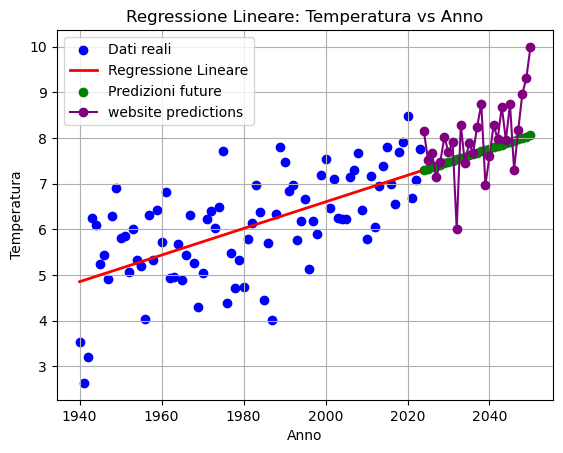

In [30]:
# Dati di esempio (sostituire con i tuoi dati reali)
years = np.arange(1940, 2024).reshape(-1, 1)

# Creazione del modello di regressione lineare
model = LinearRegression()

# Addestramento del modello
model.fit(years, temp_vil)

# Predizione delle temperature per nuovi anni
future_years = np.arange(2024, 2051).reshape(-1, 1)
predicted_temperatures = model.predict(future_years)

# Valutazione del modello
mse = mean_squared_error(temp_vil, model.predict(years))
r2 = r2_score(temp_vil, model.predict(years))

# Stampare i coefficienti del modello
print(f"Coefficiente angolare: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")
print(f"MSE: {mse}")
print(f"R^2: {r2}")

# Plot dei dati e della linea di regressione
plt.scatter(years, temp_vil, color='blue', label='Dati reali')
plt.plot(years, model.predict(years), color='red', linewidth=2, label='Regressione Lineare')
plt.scatter(future_years, predicted_temperatures, color='green', label='Predizioni future')
plt.plot(predict_vil['time'], predict_vil['temperature_2m_mean (°C)'], marker='o', linestyle='-', color='purple', label='website predictions')
plt.xlabel('Anno')
plt.ylabel('Temperatura')
plt.title('Regressione Lineare: Temperatura vs Anno')
plt.legend()
plt.grid(True)
plt.show()

### Linear regression and predictions for Lugano

Coefficiente angolare: 0.020911724183338313
Intercept: -35.20527795101158
MSE: 0.7357872020011014
R^2: 0.25893887555516115


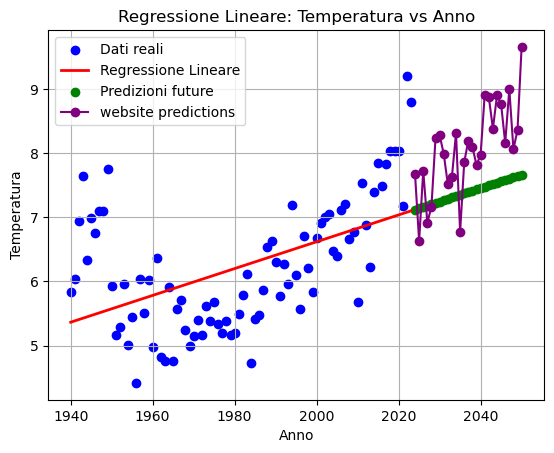

In [31]:
# Creazione del modello di regressione lineare
model = LinearRegression()

# Addestramento del modello
model.fit(years, temp_Lug)

# Predizione delle temperature per nuovi anni
predicted_temperatures = model.predict(future_years)

# Valutazione del modello
mse = mean_squared_error(temp_Lug, model.predict(years))
r2 = r2_score(temp_Lug, model.predict(years))

# Stampare i coefficienti del modello
print(f"Coefficiente angolare: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")
print(f"MSE: {mse}")
print(f"R^2: {r2}")

# Plot dei dati e della linea di regressione
plt.scatter(years, temp_Lug, color='blue', label='Dati reali')
plt.plot(years, model.predict(years), color='red', linewidth=2, label='Regressione Lineare')
plt.scatter(future_years, predicted_temperatures, color='green', label='Predizioni future')
plt.plot(predict_Lug['time'], predict_Lug['temperature_2m_mean (°C)'], marker='o', linestyle='-', color='purple', label='website predictions')
plt.xlabel('Anno')
plt.ylabel('Temperatura')
plt.title('Regressione Lineare: Temperatura vs Anno')
plt.legend()
plt.grid(True)
plt.show()

### Linear regression and predictions for Copenhagen

Coefficiente angolare: 0.025739236055599225
Intercept: -42.79652646287195
MSE: 0.6291197039851294
R^2: 0.382379985000585


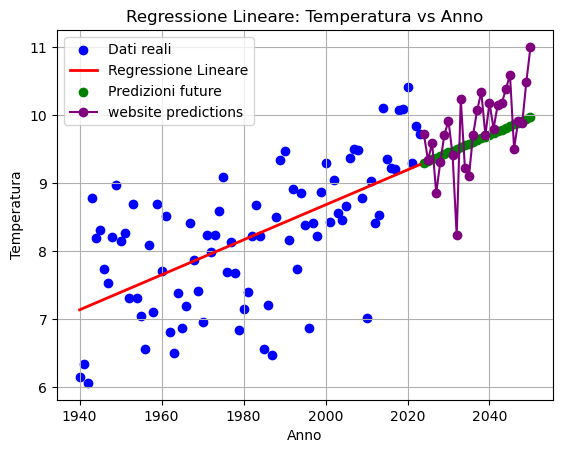

In [32]:
# Creazione del modello di regressione lineare
model = LinearRegression()

# Addestramento del modello
model.fit(years, temp_Cop)

# Predizione delle temperature per nuovi anni
predicted_temperatures = model.predict(future_years)

# Valutazione del modello
mse = mean_squared_error(temp_Cop, model.predict(years))
r2 = r2_score(temp_Cop, model.predict(years))

# Stampare i coefficienti del modello
print(f"Coefficiente angolare: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")
print(f"MSE: {mse}")
print(f"R^2: {r2}")

# Plot dei dati e della linea di regressione
plt.scatter(years, temp_Cop, color='blue', label='Dati reali')
plt.plot(years, model.predict(years), color='red', linewidth=2, label='Regressione Lineare')
plt.scatter(future_years, predicted_temperatures, color='green', label='Predizioni future')
plt.plot(predict_Cop['time'], predict_Cop['temperature_2m_mean (°C)'], marker='o', linestyle='-', color='purple', label='website predictions')
plt.xlabel('Anno')
plt.ylabel('Temperatura')
plt.title('Regressione Lineare: Temperatura vs Anno')
plt.legend()
plt.grid(True)
plt.show()

### Linear regression and predictions for Calabria

Coefficiente angolare: 0.006590493067811851
Intercept: -0.05597690072752748
MSE: 0.2377573070168994
R^2: 0.09698663514393613


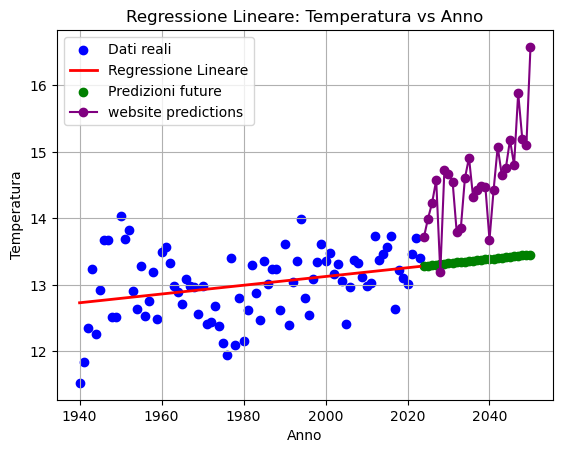

In [33]:
# Creazione del modello di regressione lineare
model = LinearRegression()

# Addestramento del modello
model.fit(years, temp_Cal)

# Predizione delle temperature per nuovi anni
predicted_temperatures = model.predict(future_years)

# Valutazione del modello
mse = mean_squared_error(temp_Cal, model.predict(years))
r2 = r2_score(temp_Cal, model.predict(years))

# Stampare i coefficienti del modello
print(f"Coefficiente angolare: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")
print(f"MSE: {mse}")
print(f"R^2: {r2}")

# Plot dei dati e della linea di regressione
plt.scatter(years, temp_Cal, color='blue', label='Dati reali')
plt.plot(years, model.predict(years), color='red', linewidth=2, label='Regressione Lineare')
plt.scatter(future_years, predicted_temperatures, color='green', label='Predizioni future')
plt.plot(predict_Cal['time'], predict_Cal['temperature_2m_mean (°C)'], marker='o', linestyle='-', color='purple', label='website predictions')
plt.xlabel('Anno')
plt.ylabel('Temperatura')
plt.title('Regressione Lineare: Temperatura vs Anno')
plt.legend()
plt.grid(True)
plt.show()

### Linear regression and predictions for Athens

Coefficiente angolare: 0.004489075911013704
Intercept: 9.748541033738285
MSE: 0.25481458004732066
R^2: 0.04442917790069123


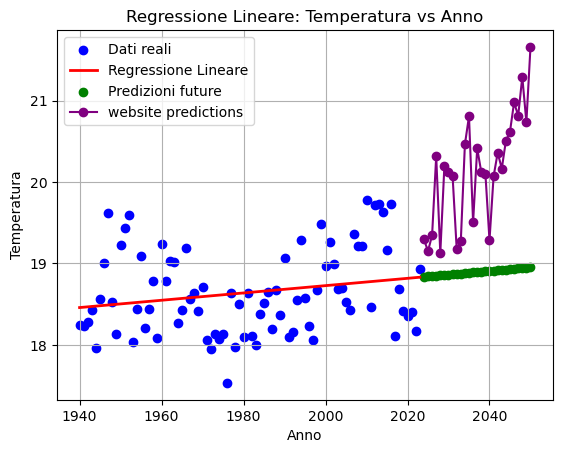

In [34]:
# Creazione del modello di regressione lineare
model = LinearRegression()

# Addestramento del modello
model.fit(years, temp_Ath)

# Predizione delle temperature per nuovi anni
predicted_temperatures = model.predict(future_years)

# Valutazione del modello
mse = mean_squared_error(temp_Ath, model.predict(years))
r2 = r2_score(temp_Ath, model.predict(years))

# Stampare i coefficienti del modello
print(f"Coefficiente angolare: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")
print(f"MSE: {mse}")
print(f"R^2: {r2}")

# Plot dei dati e della linea di regressione
plt.scatter(years, temp_Ath, color='blue', label='Dati reali')
plt.plot(years, model.predict(years), color='red', linewidth=2, label='Regressione Lineare')
plt.scatter(future_years, predicted_temperatures, color='green', label='Predizioni future')
plt.plot(predict_Ath['time'], predict_Ath['temperature_2m_mean (°C)'], marker='o', linestyle='-', color='purple', label='website predictions')
plt.xlabel('Anno')
plt.ylabel('Temperatura')
plt.title('Regressione Lineare: Temperatura vs Anno')
plt.legend()
plt.grid(True)
plt.show()